<a href="https://colab.research.google.com/github/samer-glitch/Navigating-Network-Complexity-Innovative-Strategies-for-Traffic-Analysis-and-Security-Optimization/blob/main/Volume%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 3 - Volume Analysis**




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv


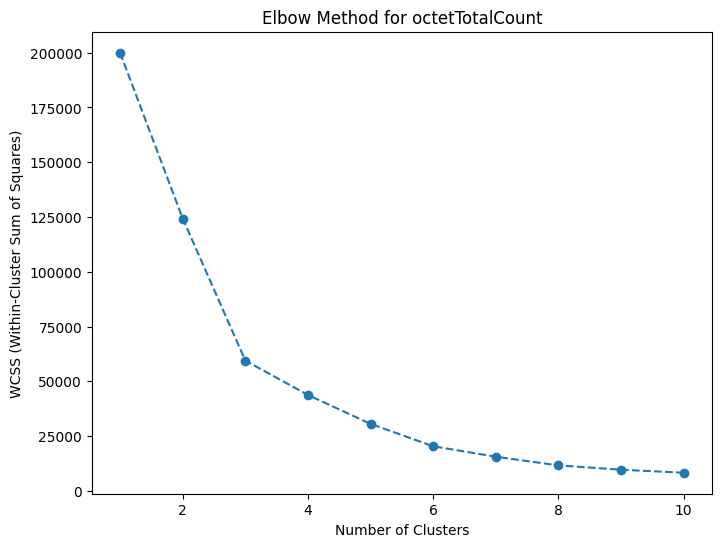

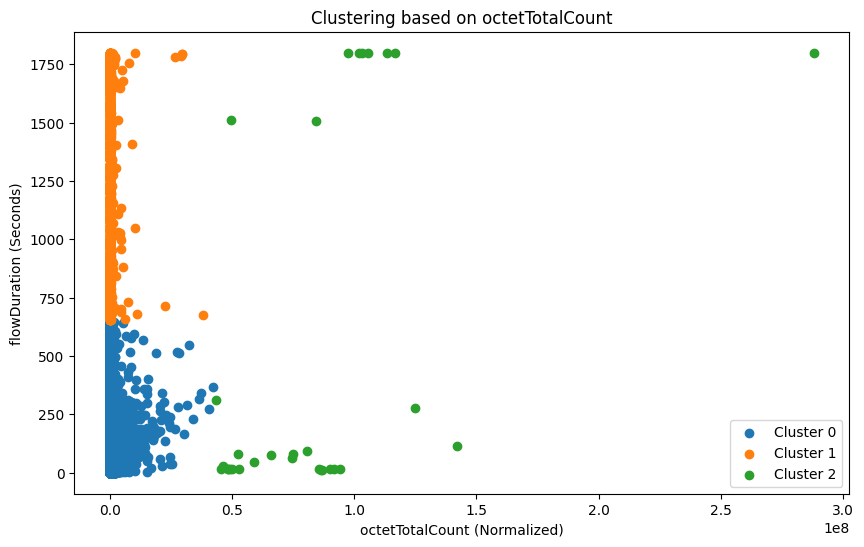

In [ ]:
# The code you provided uses K-Means clustering to group data based on two features: octetTotalCount (the total number of bytes) and flowDuration (the duration of the flow in seconds).
# Clustering is a form of unsupervised machine learning that organizes data into clusters based on similarity.
# In this context, the similarity is determined by the normalized values of octetTotalCount and flowDuration.
# The significance of this clustering can be interpreted as follows:
#    Understanding Traffic Patterns: By clustering network traffic data, you can identify patterns and group similar types of network flows together. This can help in understanding the characteristics of the network traffic, such as distinguishing between short-lived, low-volume flows and long-lasting, high-volume flows.
#    Anomaly Detection: Clusters can help in identifying unusual traffic patterns. For example, if a flow does not fit well into any established cluster, it might be considered anomalous or suspicious, which could be indicative of network issues or security threats.
#    Network Management and Planning: Clustering network flows by octetTotalCount and flowDuration can provide insights into bandwidth usage and the temporal distribution of traffic. This information is valuable for network capacity planning, quality of service (QoS) policies, and traffic engineering.
#    Data Summarization: Clustering allows for the summarization of large network traffic datasets by reducing the data to a set of representative clusters. Each cluster's centroid can be seen as a summary of the flows within that cluster.


import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv', low_memory=False)

# Select from the DataFrame 'df' 2 features 'octetTotalCount' and 'flowDuration' columns
X_octet = df[['octetTotalCount', 'flowDuration']]

# Drop rows with NaN values
X_octet = X_octet.dropna()

# Normalize the data
X_octet_normalized = (X_octet - X_octet.mean()) / X_octet.std()

# Determine the optimal number of clusters using the elbow method
wcss_octet = []
for i in range(1, 11):
    kmeans_octet = KMeans(n_clusters=i, n_init=10, random_state=0)
    kmeans_octet.fit(X_octet_normalized)
    wcss_octet.append(kmeans_octet.inertia_)


# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_octet, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for octetTotalCount')
plt.show()

# Perform K-Means clustering with n_init set explicitly
kmeans_octet = KMeans(n_clusters=3, n_init=10, random_state=0).fit(X_octet_normalized)


# Add cluster labels to the original DataFrame (ensure the original df has the same number of rows after dropping NaNs)
df = df.loc[X_octet.index]
df['cluster_octet'] = kmeans_octet.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):  # Change this to range(3) to match the number of chosen clusters
    cluster_data = df[df['cluster_octet'] == cluster]
    plt.scatter(cluster_data['octetTotalCount'], cluster_data['flowDuration'], label=f'Cluster {cluster}')

plt.xlabel('octetTotalCount (Normalized)')
plt.ylabel('flowDuration (Seconds)')
plt.title('Clustering based on octetTotalCount')
plt.legend()
plt.show()



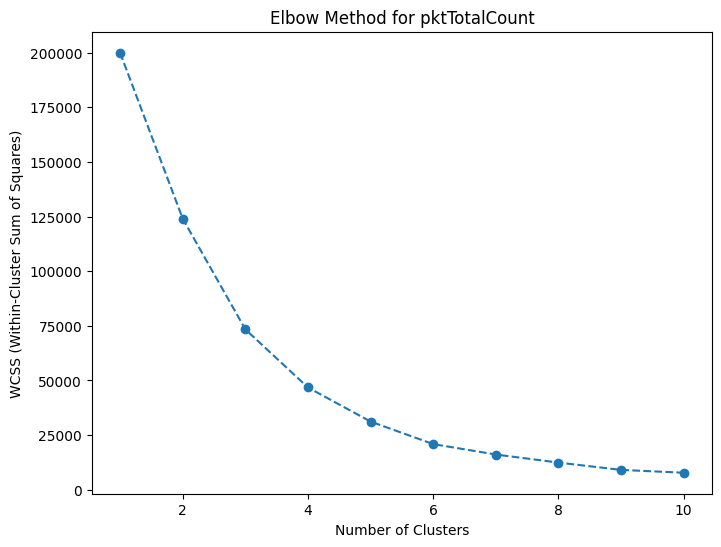

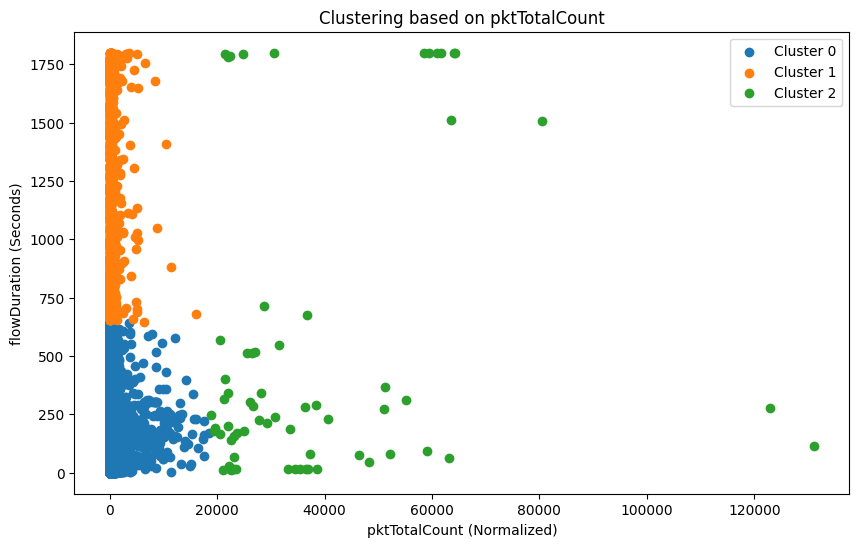

In [ ]:
# Clustering using pktTotalCount: clustering based on the number of packets exchanged. This can reveal patterns related to the frequency of packet
# The goal of the provided code is to perform K-Means clustering on network traffic data based on two features: pktTotalCount (the total number of packets) and flowDuration (the duration of the network flow in seconds).
# The significance of this clustering includes:
#    Identifying Patterns: Clustering can reveal patterns in the network traffic, such as groups of similar network flows based on packet count and duration. This can help identify common types of network behavior or usage patterns.
#    Anomaly Detection: Outliers or flows that do not fit well into any cluster may be indicative of anomalous behavior, which could be a sign of network issues or security threats.
#    Traffic Categorization: Clusters might correspond to different types of network traffic, such as bulk data transfers, streaming, or interactive sessions, allowing for better management and prioritization.
#    Network Planning: Understanding the clustering of network traffic can aid in network design, infrastructure investment, and capacity planning by showing common traffic volumes and durations.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Drop rows with NaN values in the specified columns
df = df.dropna(subset=['pktTotalCount', 'flowDuration'])

# Select the features for clustering
X_pkt = df[['pktTotalCount', 'flowDuration']]

# Normalize the data
X_pkt_normalized = (X_pkt - X_pkt.mean()) / X_pkt.std()

# Determine the optimal number of clusters using the elbow method
wcss_pkt = []
for i in range(1, 11):
    kmeans_pkt = KMeans(n_clusters=i, n_init=10, random_state=0)  # Explicitly set n_init to 10
    kmeans_pkt.fit(X_pkt_normalized)
    wcss_pkt.append(kmeans_pkt.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_pkt, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for pktTotalCount')
plt.show()


X_pkt = df[['pktTotalCount', 'flowDuration']]

# Normalize the data
X_pkt_normalized = (X_pkt - X_pkt.mean()) / X_pkt.std()

# Perform K-Means clustering with n_init set explicitly
# Perform K-Means clustering with the number of clusters determined from the elbow method (assuming 4 clusters here)
kmeans_pkt = KMeans(n_clusters=4, n_init=10, random_state=0).fit(X_pkt_normalized)  # Explicitly set n_init to 10

# Add cluster labels to the DataFrame
df['cluster_pkt'] = kmeans_pkt.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = df[df['cluster_pkt'] == cluster]
    plt.scatter(cluster_data['pktTotalCount'], cluster_data['flowDuration'], label=f'Cluster {cluster}')

plt.xlabel('pktTotalCount (Normalized)')
plt.ylabel('flowDuration (Seconds)')
plt.title('Clustering based on pktTotalCount')
plt.legend()
plt.show()


<ipython-input-12-c4988e65044f>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1500x700 with 0 Axes>

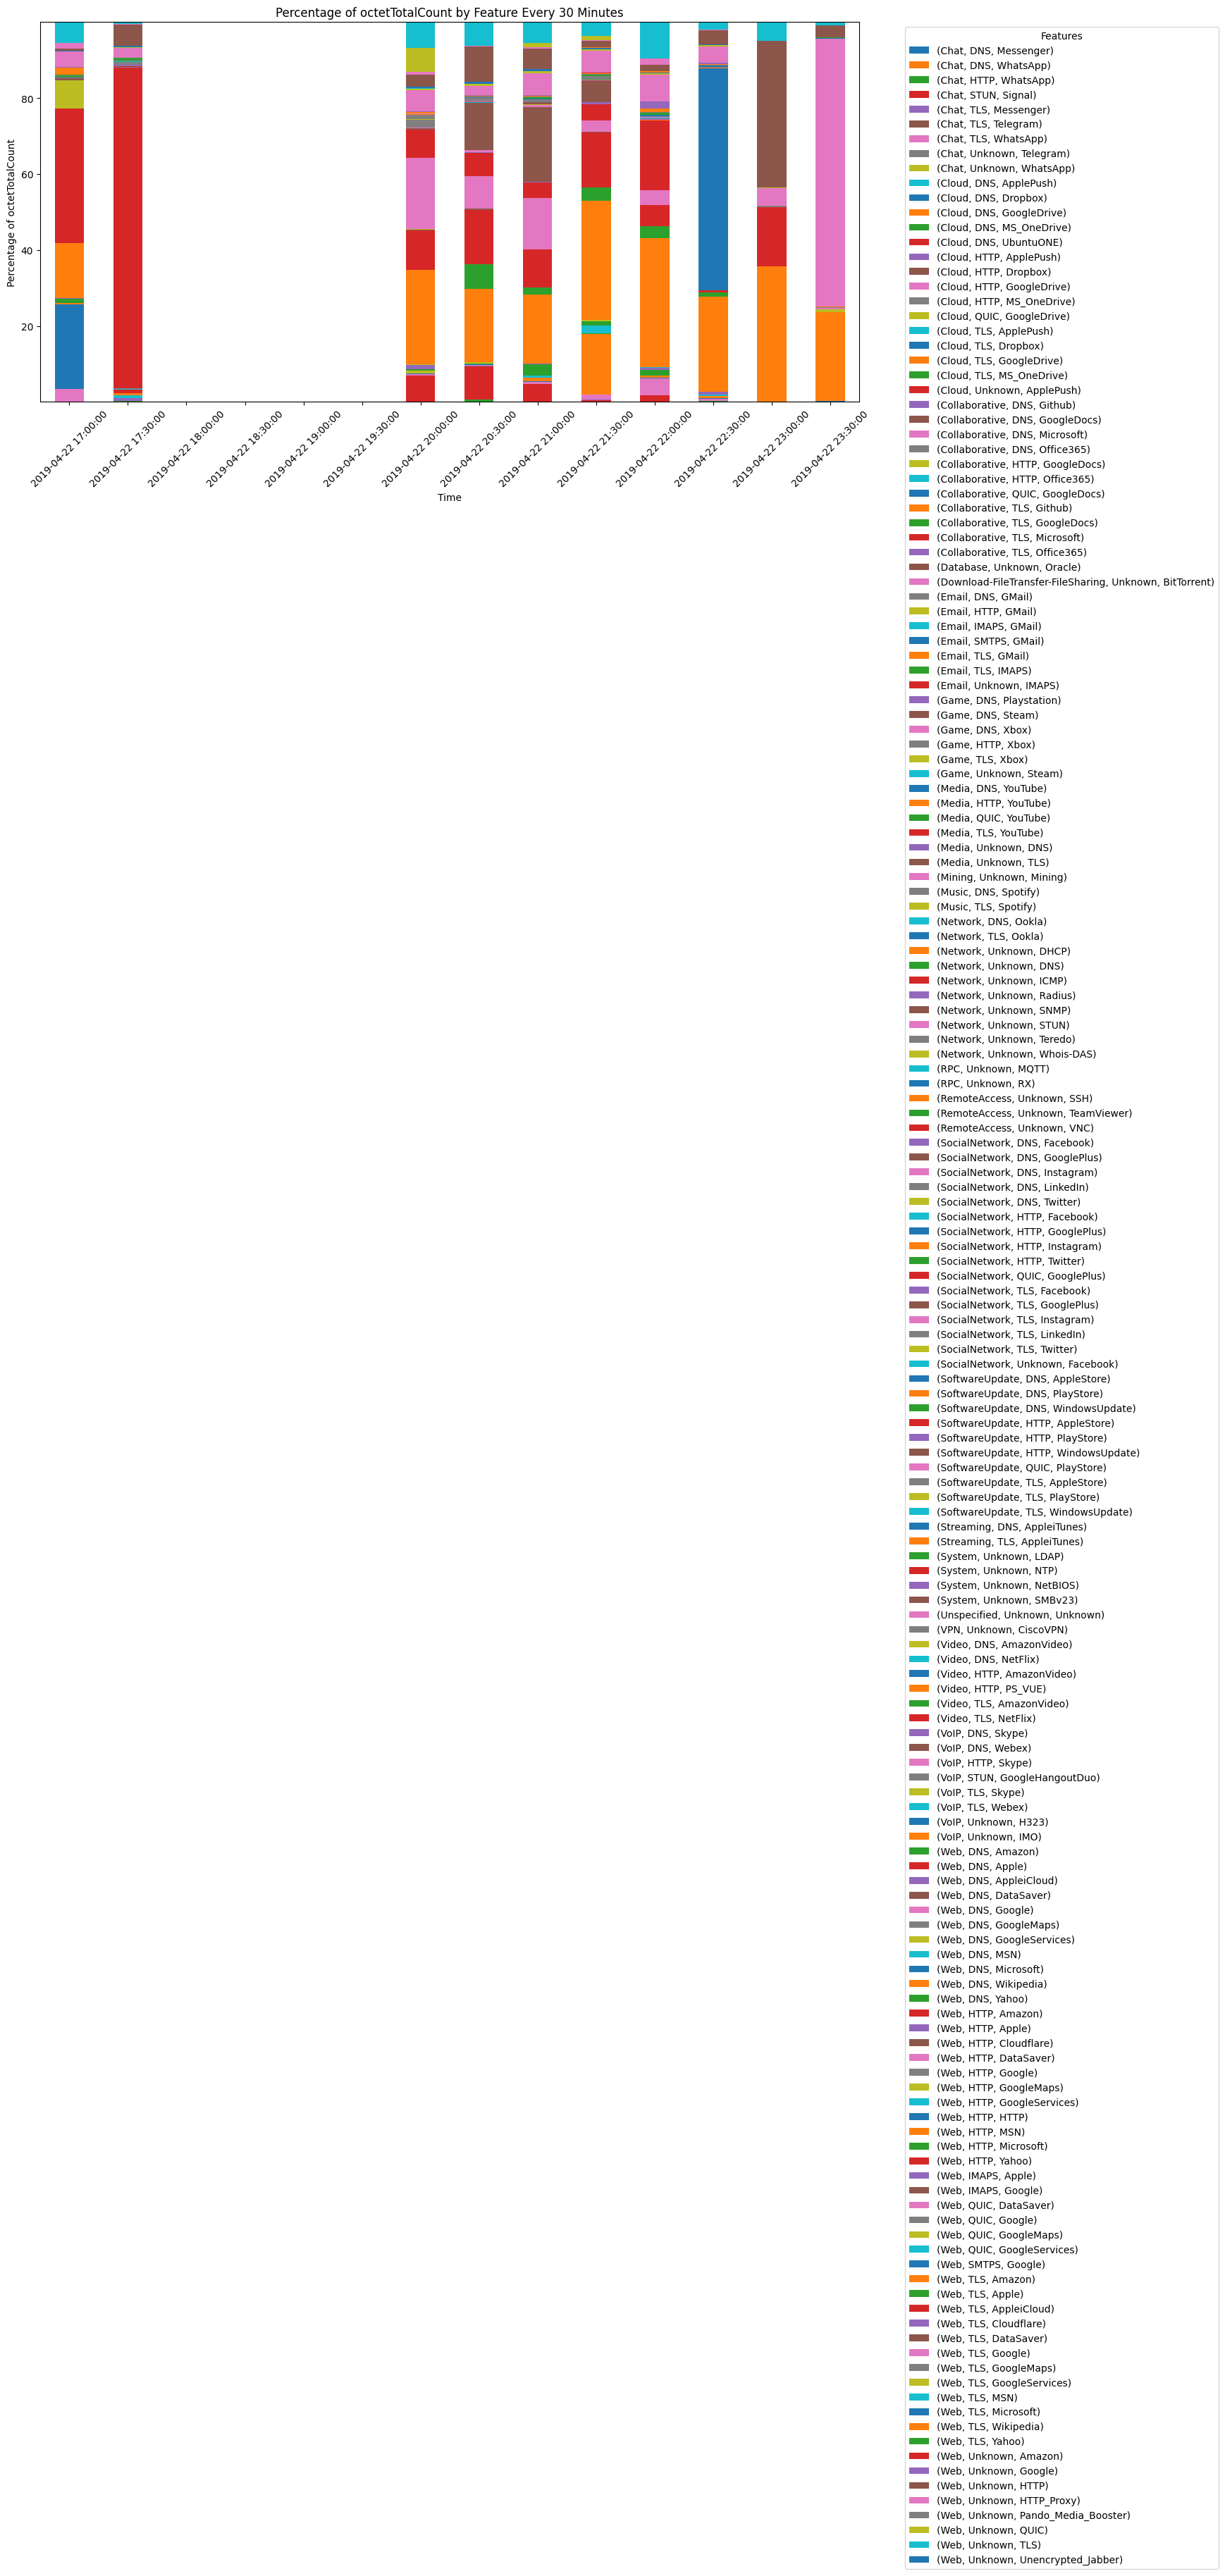

In [ ]:
# The goal of the provided code is to analyze network traffic data and visualize the distribution of data volume, as measured by the octetTotalCount feature,
# across different network flow characteristics (category, application_protocol, web_service) over time.
# The significance of this code and the resulting visualization is to provide insights into how network traffic volume is distributed among different types of traffic (as categorized by category, application_protocol, and web_service) over time.
# This analysis can help network administrators and analysts to:
#    Understand the typical patterns of network usage.
#    Identify which categories, application protocols, or web services contribute most to the network load during different times of the day.
#    Detect anomalies in traffic distribution that might indicate issues like network congestion, misuse, or cyber threats.
#    Make data-driven decisions regarding network management, capacity planning, and security measures.
# The visualization can serve as a tool for reporting and communicating these insights to others involved in network operations and planning.

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv', low_memory=False)
# Convert 'flowStart' to datetime if it's not already
df['flowStart'] = pd.to_datetime(df['flowStart'], unit='s')

# Group by features first, then resample within each group to 30-minute intervals and sum 'octetTotalCount'
grouped = df.groupby(['category', 'application_protocol', 'web_service']).apply(
    lambda x: x.set_index('flowStart').resample('30T').agg({'octetTotalCount': 'sum'})).reset_index()

# Calculate the total octetTotalCount for each time bin
total_octets_per_interval = grouped.groupby('flowStart')['octetTotalCount'].transform('sum')

# Calculate the percentage of octetTotalCount for each feature
grouped['percentage'] = (grouped['octetTotalCount'] / total_octets_per_interval) * 100

# Now create a bar chart for each 30-minute interval
# We'll pivot the data to have one bar per feature per interval
pivoted_data = grouped.pivot_table(index='flowStart', columns=['category', 'application_protocol', 'web_service'], values='percentage', aggfunc='sum').fillna(0)

# Plotting
plt.figure(figsize=(15, 7))  # Adjust figure size as needed

# Plot a stacked bar chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(15, 7), legend=False)  # Optionally turn off the legend

plt.title('Percentage of octetTotalCount by Feature Every 30 Minutes')
plt.xlabel('Time')
plt.ylabel('Percentage of octetTotalCount')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


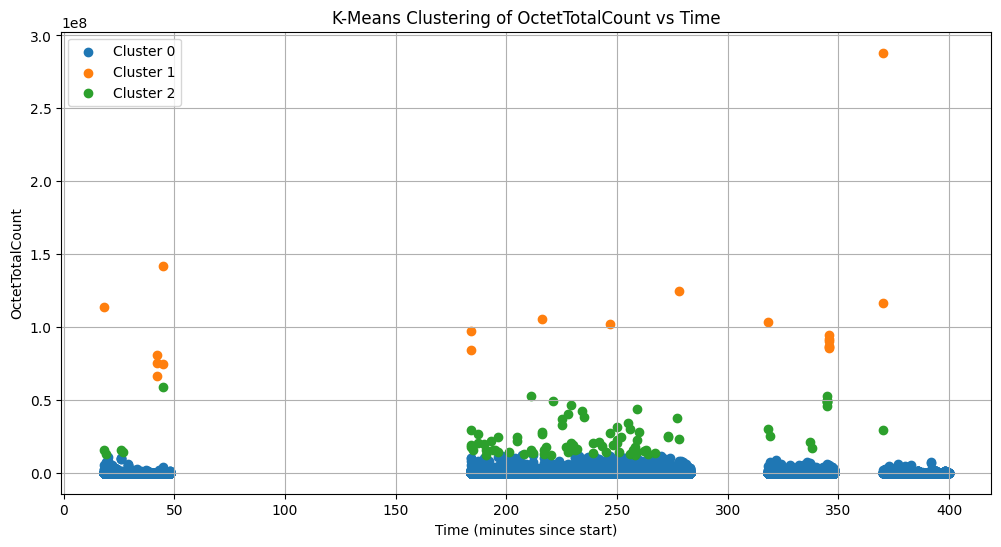

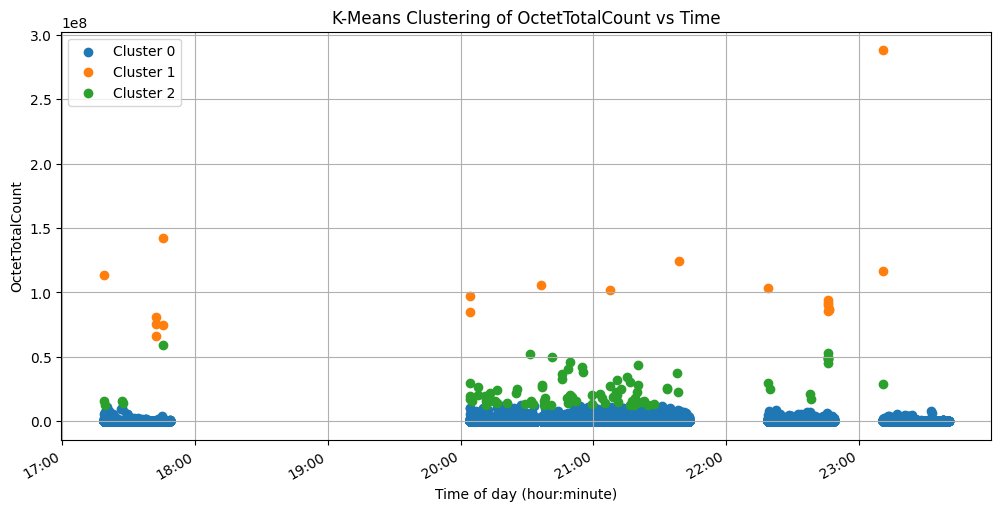

In [ ]:
# The code you've provided aims to perform K-Means clustering on network flow data based on two features:
# octetTotalCount (the total amount of data transferred during a network flow, presumably in bytes) and time_interval (the time in minutes since the start of the dataset).
# After performing clustering, it visualizes the clusters in a scatter plot, showing how the octetTotalCount is distributed over time, with different clusters potentially representing different types of network behavior or usage patterns.
# The significance of clustering network flow data based on octetTotalCount (the total bytes transferred) and actual time of the flow, and then visualizing this clustering, lies in several key areas of network analysis and management:
#    -Traffic Pattern Analysis: By clustering the data based on the amount of data transferred and the time of the flow, you can identify patterns in network usage over time. This can reveal peak usage times, periods of low activity,
#     and potentially unusual spikes in data transfer, which are crucial for understanding network behavior.
#    -Anomaly Detection: The visualization and clustering might help in detecting anomalies. For example, a cluster that represents unusually high data transfer volumes at times when the network is typically quiet could indicate a potential security breach,
#     such as data exfiltration, or an improperly configured application.
#    -Network Planning and Optimization: Understanding how network traffic varies throughout the day can assist in capacity planning and infrastructure optimization.
#     For instance, if certain times consistently show high data transfer volumes, network administrators might plan to allocate more resources during these periods or optimize network configurations to handle the load more efficiently.
#    -Quality of Service (QoS) Management: Clusters may help in identifying types of traffic that could be prioritized or deprioritized to manage QoS. For example, essential services or applications could be identified as those contributing to critical
#     clusters and thus could be given priority in terms of bandwidth.
#     Operational Insights: By correlating the clusters with known events or scheduled activities, organizations can gain insights into the impact of operational decisions on network traffic.
#     This could include the effects of deploying new applications, updates, or changes in user behavior.
#    -Predictive Analysis: Over time, collecting and analyzing such clustering data can help predict future network demands based on historical patterns, assisting in proactive network management and decision-making.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a DataFrame named 'df' with your dataset

# Convert flowStart to datetime
df['flowStart'] = pd.to_datetime(df['flowStart'], unit='s')

# Extract hour and minute from flowStart
df['hour'] = df['flowStart'].dt.hour
df['minute'] = df['flowStart'].dt.minute

# Create a new column for the time in minutes since the start of the dataset
df['time_interval'] = (df['hour'] * 60 + df['minute']) - df['hour'].min() * 60

# Create a DataFrame with octetTotalCount and time_interval
X = df[['octetTotalCount', 'time_interval']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)  # You can choose the number of clusters
df['cluster'] = kmeans.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(12, 6))
for cluster, data in df.groupby('cluster'):
    plt.scatter(data['time_interval'], data['octetTotalCount'], label=f'Cluster {cluster}')

plt.title('K-Means Clustering of OctetTotalCount vs Time')
plt.xlabel('Time (minutes since start)')
plt.ylabel('OctetTotalCount')
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.dates as mdates

# Plot the clusters
plt.figure(figsize=(12, 6))
for cluster, data in df.groupby('cluster'):
    plt.scatter(data['flowStart'], data['octetTotalCount'], label=f'Cluster {cluster}')

# Format x-axis to show time of day (hour:minute)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Interval can be adjusted
plt.gcf().autofmt_xdate()  # Rotate date labels to prevent overlap

plt.title('K-Means Clustering of OctetTotalCount vs Time')
plt.xlabel('Time of day (hour:minute)')
plt.ylabel('OctetTotalCount')
plt.legend()
plt.grid(True)
plt.show()


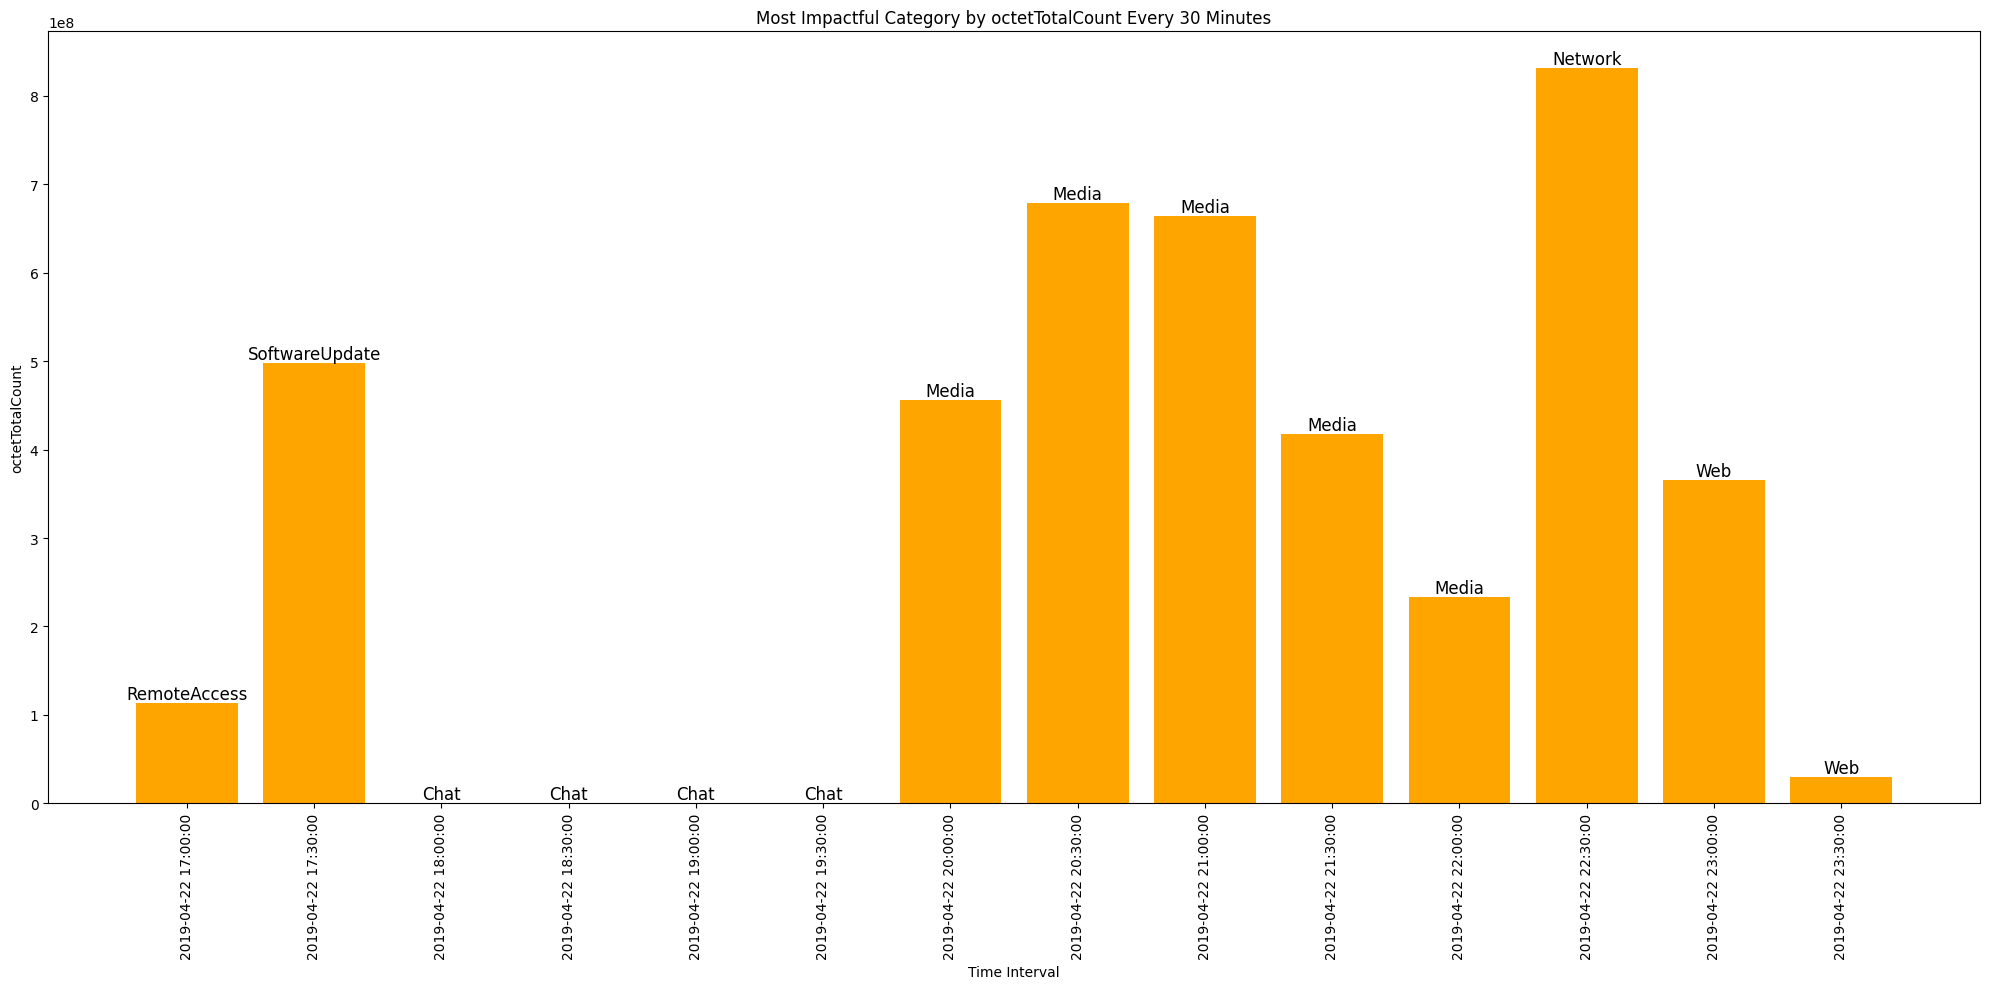

In [ ]:
"""'''
The goal of this code is to visualize the most impactful categories based on octetTotalCount (the total number of bytes) in each 30-minute interval within a dataset. It creates a bar chart where each bar represents the octetTotalCount for a specific time interval, colored in orange. On top of each bar, the code adds a label indicating the category associated with that bar's octetTotalCount.

The significance of this visualization lies in:

- Identifying Peak Usage: By showing the octetTotalCount in regular intervals, the plot helps identify periods of high data transfer, which are critical for understanding network load and peak usage times.

- Category Analysis: Adding category labels to each bar allows for quick identification of which categories contribute most to the data transfer volume at different times, offering insights into the nature of the network traffic.

- Operational Planning: Knowing which categories dominate network traffic and when can assist in capacity planning, network optimization, and setting Quality of Service (QoS) policies tailored to specific categories or times of day.

- Performance Monitoring: The visualization serves as a tool for monitoring network performance and the impact of specific categories on the overall network health, guiding decisions on infrastructure upgrades or adjustments.
'''"""
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-100000rows(ALLFEATURES).csv', low_memory=False)

# First, ensure 'flowStart' is set as the index if it's not already
df['flowStart'] = pd.to_datetime(df['flowStart'], unit='s')
df.set_index('flowStart', inplace=True)

# Example of grouping by 'category' (or other relevant features) and resampling every 30 minutes
grouped = df.groupby(['category']).resample('30T').agg({'octetTotalCount': 'sum'}).reset_index()

# Now, to define max_octet_category, you might want to find the category with the maximum 'octetTotalCount' for each interval
# This is a placeholder operation - you'll need to adjust it based on how you define "most impactful"
max_octet_category = grouped.loc[grouped.groupby('flowStart')['octetTotalCount'].idxmax()]

# Assuming 'time_bin' in your original question refers to these 30-minute intervals, which might be directly 'flowStart' here
max_octet_category['time_bin'] = max_octet_category['flowStart']

# Now max_octet_category is defined, and you can proceed with plotting
plt.figure(figsize=(20, 10))
bars = plt.bar(max_octet_category['time_bin'].astype(str), max_octet_category['octetTotalCount'], color='orange')

# Add labels to each bar
for bar, label in zip(bars, max_octet_category['category']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, label, ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=90)
plt.xlabel('Time Interval')
plt.ylabel('octetTotalCount')
plt.title('Most Impactful Category by octetTotalCount Every 30 Minutes')
plt.tight_layout()
plt.show()


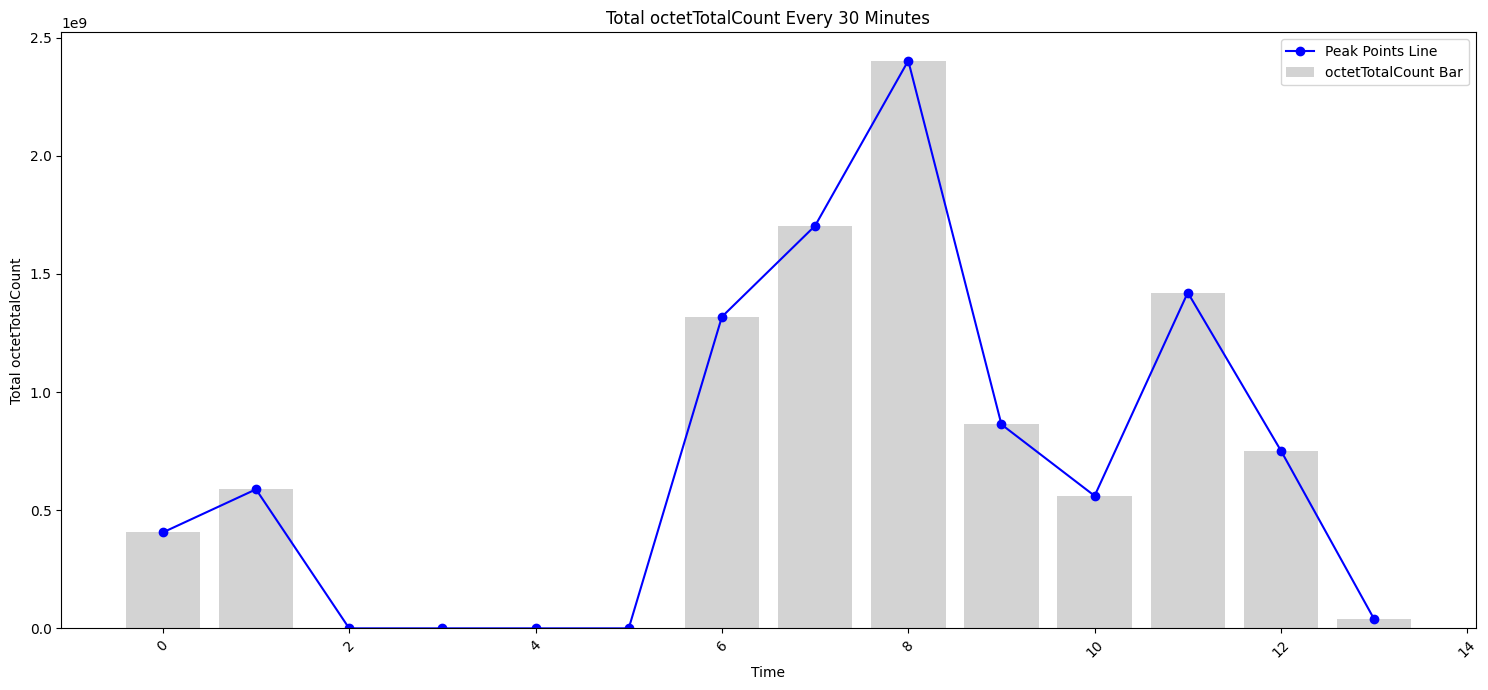

In [ ]:
'''
Goal: The goal of this code is to create a visualization that shows the total amount of data transferred (octetTotalCount) in each 30-minute interval over a period of time.
Significance:
    Monitoring Data Usage: It helps in monitoring the volume of data transferred at regular intervals, which is essential for understanding network load and usage patterns.
    Identifying Trends: The plot can reveal trends or patterns in data transfer over time, such as peak usage periods or variations in network activity.
    Capacity Planning: Understanding when data usage peaks occur can assist in capacity planning for network resources and infrastructure.
    '''

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'aggregated' is your DataFrame resulting from resampling and aggregation
# with 'flowStart' as the datetime index or a column, and 'octetTotalCount' aggregated every 30 minutes

# Plotting
plt.figure(figsize=(15, 7))  # Adjust figure size as needed

# Create bar plot using the index for x-axis
bars = plt.bar(aggregated.index, aggregated['octetTotalCount'], color='lightgrey', label='octetTotalCount Bar')

# Create line plot on top of the bar plot connecting the peak points
#plt.plot(aggregated.index, aggregated['octetTotalCount'], marker='o', linestyle='-', color='blue', label='Peak Points Line')
plt.plot(aggregated['flowStart_datetime'], aggregated['octetTotalCount'], marker='o', linestyle='-', color='blue', label='Peak Points Line')

plt.title('Total octetTotalCount Every 30 Minutes')
plt.xlabel('Time')
plt.ylabel('Total octetTotalCount')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


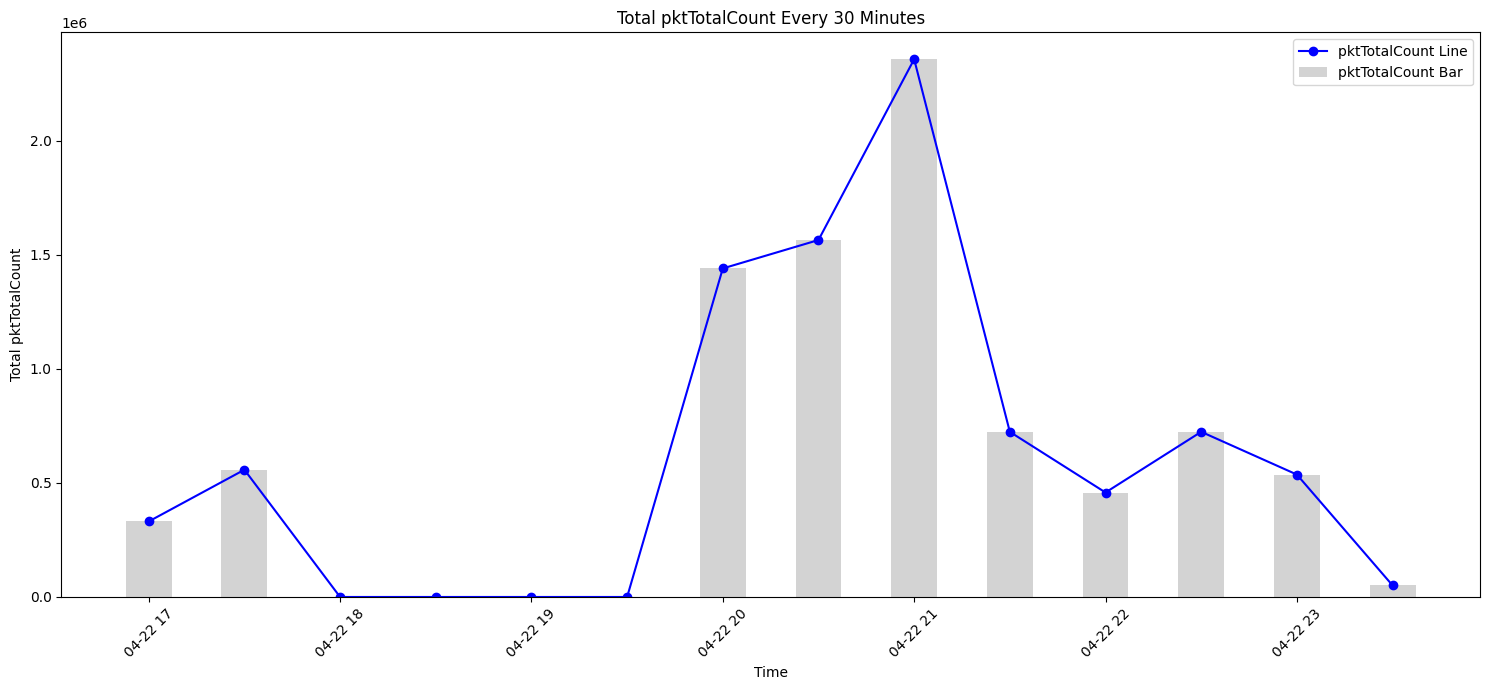

In [ ]:
'''
    Goal: The goal of this code is to visualize the total number of packets exchanged (pktTotalCount) in each 30-minute interval over a period of time.
    Significance:
        Network Analysis: It provides insights into the volume of network packets exchanged at regular intervals, which is crucial for network analysis and optimization.
        Peak Detection: The visualization can help identify peak packet exchange times, which may be associated with specific network activities or events.
        Performance Monitoring: Monitoring packet count over time is essential for assessing network performance and detecting anomalies or issues.
        '''
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded and the index is set to 'flowStart_datetime'
# Assuming 'flowStart_datetime' is already your DataFrame index and data is aggregated

# Resample and aggregate pktTotalCount every 30 minutes again for clarity
aggregated = df.resample('30T').agg({'pktTotalCount': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(15, 7))  # Adjust figure size as needed

# Create bar plot
plt.bar(aggregated['flowStart_datetime'], aggregated['pktTotalCount'], width=0.01, color='lightgrey', label='pktTotalCount Bar')

# Create line plot on top of the bar plot
plt.plot(aggregated['flowStart_datetime'], aggregated['pktTotalCount'], marker='o', linestyle='-', color='blue', label='pktTotalCount Line')

plt.title('Total pktTotalCount Every 30 Minutes')
plt.xlabel('Time')
plt.ylabel('Total pktTotalCount')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.legend()
plt.tight_layout()
plt.show()
